# `beeswarm` 플롯

이 노트북은 `shap.plots.beeswarm` 함수를 사용하는 방법을 보여주기 위해(그리고 문서화하기 위해) 고안되었습니다. 이 노트북은 고전적인 UCI 성인 소득 데이터 집합(1990년대에 5만 달러 이상의 소득을 올린 사람이 있는지 예측하는 분류 작업)에서 훈련된 XGBoost 모델을 사용합니다.

In [1]:
import xgboost
import shap

#  XGBoost 모델 훈련
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

#  SHAP 값 계산
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

 99%|===================| 32083/32561 [00:56<00:00]        

## 간단한 beeswarm 요약 플롯

벌집형 플롯은 데이터 집합의 상위 특징이 모델의 출력에 어떤 영향을 미치는지에 대한 정보 밀도가 높은 요약을 표시하도록 설계되었습니다. 주어진 설명은 각 특징 흐름에 하나의 점으로 표시됩니다. 점의 x 위치는 해당 피처의 SHAP 값(`shap_values.value[instance,feature]`)에 의해 결정되며, 각 피처 행을 따라 점들이 "쌓여" 밀도를 나타냅니다. 색상은 피처의 원래 값을 표시하는 데 사용됩니다(`shap_values.data[instance,feature]`). 아래 플롯에서 평균적으로 연령이 가장 중요한 특징이며, 젊은(파란색) 사람일수록 \\$50,000 이상을 벌 가능성이 낮다는 것을 알 수 있습니다. 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


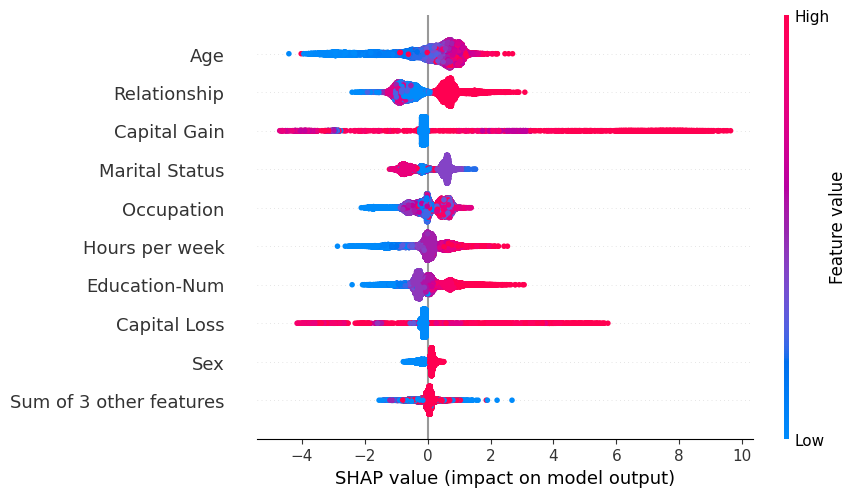

In [2]:
shap.plots.beeswarm(shap_values)

기본적으로 표시되는 기능의 최대 개수는 10개이지만 `max_display` 매개변수를 사용하여 조정할 수 있습니다:

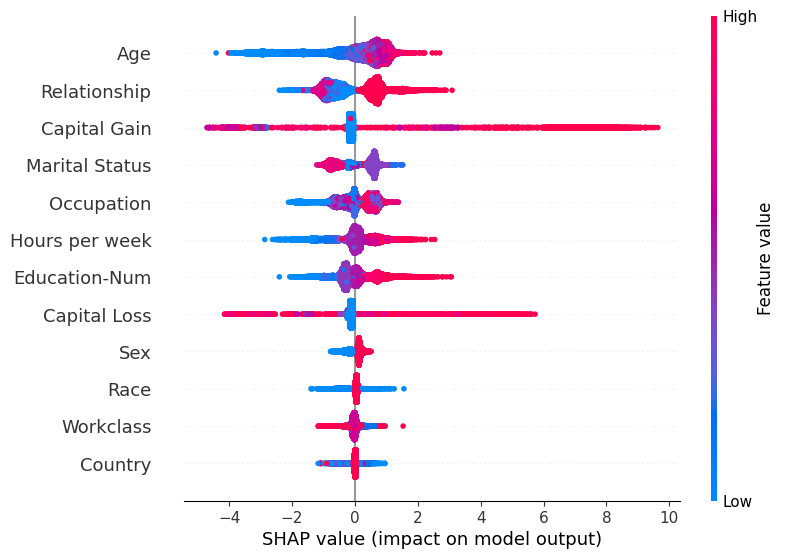

In [3]:
shap.plots.beeswarm(shap_values, max_display=20)

## 특징 순서 지정

기본적으로 특징은 각 특징에 대한 SHAP 값의 평균 절대값인 `shap_values.abs.mean(0)`을 사용하여 정렬됩니다. 그러나 이 순서는 광범위한 평균 영향에 더 중점을 두고 드물지만 크기가 큰 영향에는 덜 중점을 둡니다. 개별 사용자에 대한 영향력이 높은 특징을 찾으려면 최대 절대값을 기준으로 정렬하면 됩니다:

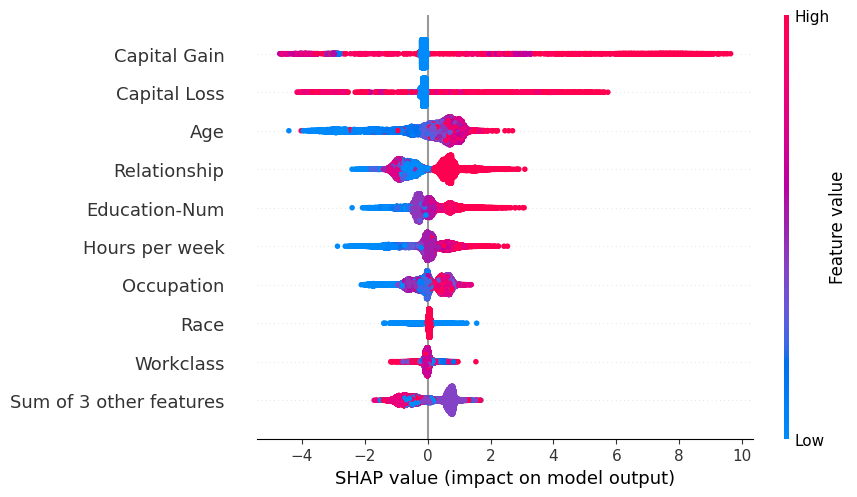

In [4]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

## 유용한 변환

때때로 SHAP 값을 플롯하기 전에 변환하는 것이 도움이 될 수 있습니다. 아래에서는 절대값을 플롯하고 색상을 빨간색으로 고정합니다. 이렇게 하면 막대형 막대그래프가 벌집형 막대그래프에서 점의 평균값만 그리기 때문에 표준 `shap_values.abs.mean(0)` 막대그래프보다 더 풍부한 평행선을 만들 수 있습니다.

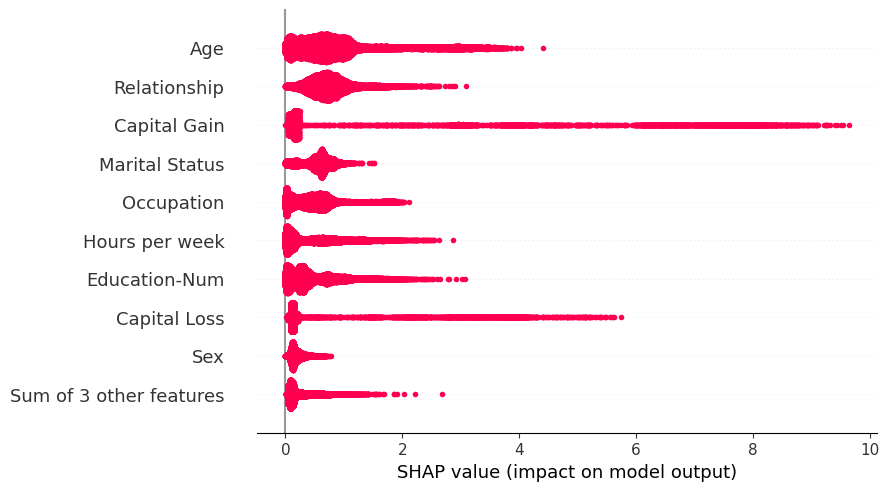

In [5]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

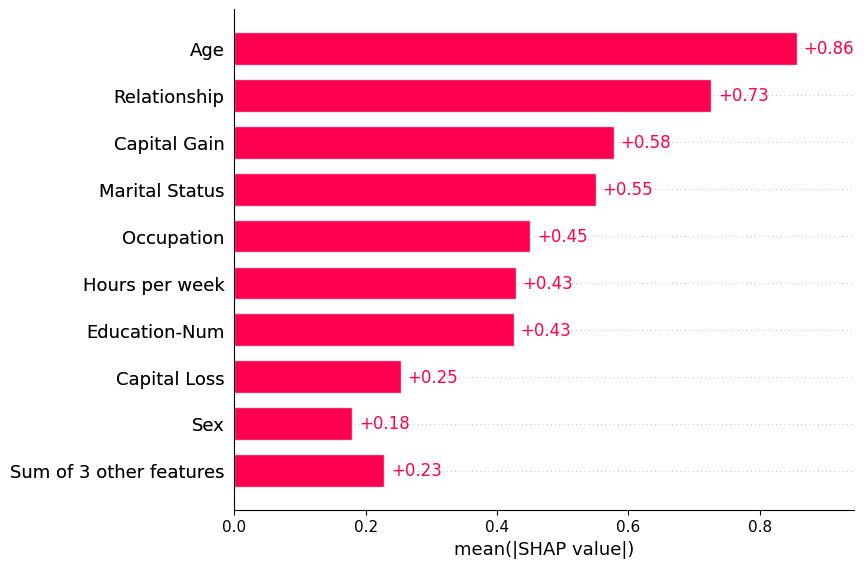

In [6]:
shap.plots.bar(shap_values.abs.mean(0))

## 사용자 정의 색상

기본적으로 `beeswarm`은 `shap.plots.colors.red_blue` 컬러 맵을 사용하지만 `color` 매개 변수를 사용하여 모든 matplotlib 컬러 또는 컬러 맵을 전달할 수 있습니다:

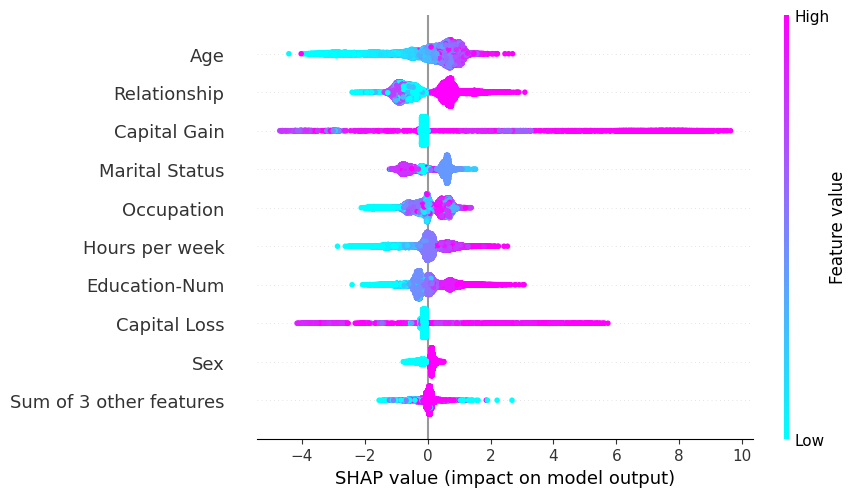

In [7]:
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values, color=plt.get_cmap("cool"))

<hr>
Have an idea for more helpful examples? Pull requests that add to this documentation notebook are encouraged! 